In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

invoice_df = pd.read_csv('fct_invoice.csv')
customer_df = pd.read_json('dim_customer.json')

In [32]:
invoice_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [33]:
customer_df.rename(columns={'id':'customer_id'}, inplace=True)
customer_df

,age,first_name,gender,customer_id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


# Easy

In [34]:
#1. How many unique customers are in the dataset?
unique_customers = invoice_df['customer_id'].nunique()
print('Number of unique customers: ', unique_customers)

unique_customers = customer_df['customer_id'].nunique()
print('Number of unique customers: ', unique_customers)

Number of unique customers:  5191
Number of unique customers:  5191


In [35]:
#2 What are the different categories of products available? How many unique categories are there?
categories = invoice_df['category'].unique()
num_categories = len(categories)

print('Differnet categories: ', categories)
print('Number of unique categories: ', num_categories)

Differnet categories:  ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Number of unique categories:  8


In [36]:
#3. Which payment method is the most popular? How many times was it used?
method = invoice_df['payment_method']. value_counts().idxmax()
frequency = invoice_df['payment_method']. value_counts(). max()

print('Most popular method: ', method)
print('Times used: ', frequency)

Most popular method:  Cash
Times used:  44447


# Medium

In [37]:
#1. What are the three most popular categories, by total sales?
invoice_df['sales'] = invoice_df['price'] * invoice_df['quantity']
top_categories = invoice_df.groupby('category')['sales'].sum().nlargest(3)

print('Three most popular categories, by total sales:')
print(top_categories)

Three most popular categories, by total sales:
category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64


In [38]:
#2. What are the total sales attributed to customers over the age of 45?
total_sales = invoice_df[invoice_df['customer_id'].isin(customer_df[customer_df['age'] > 45]['customer_id'])]['sales'].sum()

print('Total sales attributed to customers over the age of 45:', total_sales)

Total sales attributed to customers over the age of 45: 82039768.15


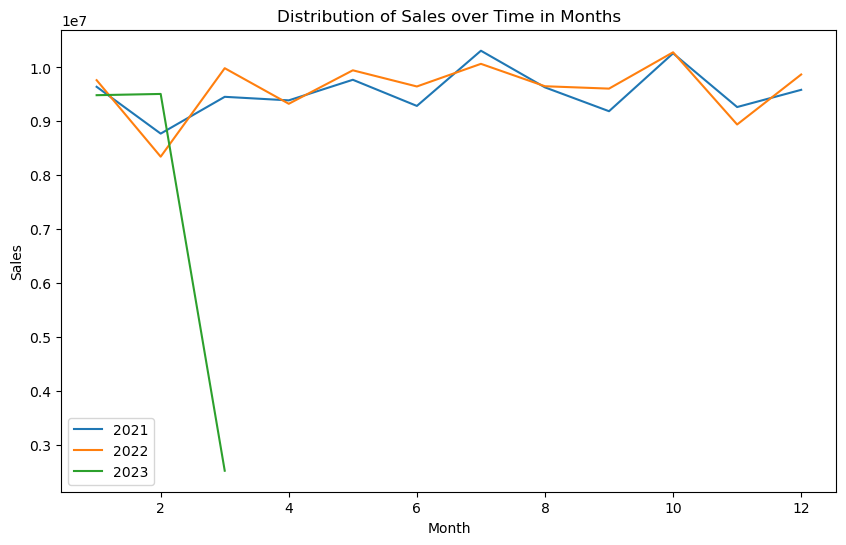

In [39]:
#3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)
invoice_df['invoice_date'] = pd.to_datetime(invoice_df['invoice_date'], format='%d/%m/%Y')

invoice_df['year'] = invoice_df['invoice_date'].dt.year
invoice_df['month'] = invoice_df['invoice_date'].dt.month

sales_distribution = invoice_df.groupby(['year', 'month'])['sales'].sum()
sales_distribution = sales_distribution.unstack(level=0)

sales_distribution.plot(kind='line', figsize=(10, 6))
plt.title('Distribution of Sales over Time in Months')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(['2021', '2022', '2023'])
plt.show()

In [57]:
# March, May, July, October, and December tend to see a rise in sales.
# Sales tend to decrease during February, April, June, August, September, and November.
# July and October are usually the months with the highest sales activity.
# February is typically the month with the lowest sales.
# In 2023, sales significantly dropped from February to March

# Hard

In [63]:
#1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).
new_df = pd.merge(invoice_df, customer_df, on="customer_id", how="inner")
age_bins = range(0, 101, 10)
age_labels = [f'{i}-{i+9}' for i in range(0, 100, 10)]
new_df["age_range"] = pd.cut(new_df["age"], bins=age_bins, labels=age_labels, right=False)
new_df["age_range"] = new_df["age_range"].cat.add_categories("No Age")
new_df.loc[new_df["age"].isnull(), "age_range"] = "No Age"
pivot_table = pd.pivot_table(new_df, values="sales", index="age_range", columns="category", aggfunc="sum")
pivot_table

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
age_range,,,,,,,,
0-9,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
10-19,12801.75,1927413.84,109619.36,13582.31,993281.35,12375.15,1129800.0,60426.24
20-29,79461.75,10250732.80,605915.32,73491.96,5924878.24,54943.32,5261550.0,385100.80
30-39,84143.10,11354126.96,723544.70,87246.86,7200839.66,64092.72,6159300.0,420582.40
40-49,87203.40,11215189.92,665034.96,89553.29,7025590.02,66391.80,5954550.0,390906.88
50-59,74962.20,10321851.76,587780.96,72425.04,5852857.84,54943.32,4435200.0,345067.52
60-69,80476.80,10660642.08,649990.76,80976.09,5978893.54,55025.43,5471550.0,363955.20
70-79,54827.85,7769371.28,419082.62,55050.98,4480269.05,38673.81,3638250.0,273244.16
80-89,26664.00,4493698.00,254531.60,31332.93,2628744.60,23718.06,1946700.0,153932.80
